In [1]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.getOrCreate()

In [3]:
spark

In [4]:
mydf = spark.read.parquet("s3://zandras3/502final/df.parquet/*")

In [5]:
mydf.printSchema()

root
 |-- GLOBALEVENTID: string (nullable = true)
 |-- SQLDATE: string (nullable = true)
 |-- MonthYear: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- FractionDate: string (nullable = true)
 |-- Actor1Code: string (nullable = true)
 |-- Actor1Name: string (nullable = true)
 |-- Actor1CountryCode: string (nullable = true)
 |-- Actor1KnownGroupCode: string (nullable = true)
 |-- Actor1EthnicCode: string (nullable = true)
 |-- Actor1Religion1Code: string (nullable = true)
 |-- Actor1Religion2Code: string (nullable = true)
 |-- Actor1Type1Code: string (nullable = true)
 |-- Actor1Type2Code: string (nullable = true)
 |-- Actor1Type3Code: string (nullable = true)
 |-- Actor2Code: string (nullable = true)
 |-- Actor2Name: string (nullable = true)
 |-- Actor2CountryCode: string (nullable = true)
 |-- Actor2KnownGroupCode: string (nullable = true)
 |-- Actor2EthnicCode: string (nullable = true)
 |-- Actor2Religion1Code: string (nullable = true)
 |-- Actor2Religion2Code: stri

In [6]:
df_feat = mydf.select(mydf.SQLDATE, mydf.MonthYear, mydf.Year, 
                      mydf.Actor1Code, mydf.Actor1Name,mydf.Actor1CountryCode,
                      mydf.Actor2Code, mydf.Actor2Name, mydf.Actor2CountryCode, 
                      mydf.QuadClass, mydf.GoldsteinScale, mydf.NumSources, 
                      mydf.AvgTone, mydf.Actor1Geo_Type, mydf.Actor1Geo_CountryCode,
                     mydf.Actor1Geo_Lat, mydf.Actor1Geo_Long, mydf.Actor2Geo_Type, 
                      mydf.Actor2Geo_CountryCode, mydf.Actor2Geo_Lat, mydf.Actor2Geo_Long,
                     mydf.ActionGeo_Type, mydf.ActionGeo_CountryCode,
                     mydf.ActionGeo_Lat, mydf.ActionGeo_Long, mydf.SOURCEURL)

In [7]:
df_feat.printSchema()

root
 |-- SQLDATE: string (nullable = true)
 |-- MonthYear: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Actor1Code: string (nullable = true)
 |-- Actor1Name: string (nullable = true)
 |-- Actor1CountryCode: string (nullable = true)
 |-- Actor2Code: string (nullable = true)
 |-- Actor2Name: string (nullable = true)
 |-- Actor2CountryCode: string (nullable = true)
 |-- QuadClass: string (nullable = true)
 |-- GoldsteinScale: string (nullable = true)
 |-- NumSources: string (nullable = true)
 |-- AvgTone: string (nullable = true)
 |-- Actor1Geo_Type: string (nullable = true)
 |-- Actor1Geo_CountryCode: string (nullable = true)
 |-- Actor1Geo_Lat: string (nullable = true)
 |-- Actor1Geo_Long: string (nullable = true)
 |-- Actor2Geo_Type: string (nullable = true)
 |-- Actor2Geo_CountryCode: string (nullable = true)
 |-- Actor2Geo_Lat: string (nullable = true)
 |-- Actor2Geo_Long: string (nullable = true)
 |-- ActionGeo_Type: string (nullable = true)
 |-- ActionGeo_Coun

In [9]:
df_feat.show(15)

+--------+---------+----+----------+------------+-----------------+---------+--------------+----------+-----------------+--------------+---------------------+-------------+--------------+--------------+---------------------+-------------+--------------+--------------+---------------------+-------------+--------------+
| SQLDATE|MonthYear|Year|Actor2Code|  Actor2Name|Actor2CountryCode|QuadClass|GoldsteinScale|NumSources|          AvgTone|Actor1Geo_Type|Actor1Geo_CountryCode|Actor1Geo_Lat|Actor1Geo_Long|Actor2Geo_Type|Actor2Geo_CountryCode|Actor2Geo_Lat|Actor2Geo_Long|ActionGeo_Type|ActionGeo_CountryCode|ActionGeo_Lat|ActionGeo_Long|
+--------+---------+----+----------+------------+-----------------+---------+--------------+----------+-----------------+--------------+---------------------+-------------+--------------+--------------+---------------------+-------------+--------------+--------------+---------------------+-------------+--------------+
|20151224|   201512|2015|       BUS|    

### Sentiment Analysis Overview

In [8]:
from pyspark.sql.functions import avg

In [13]:
tone = df_feat.select("Year","AvgTone").groupBy("Year").agg(avg("AvgTone"))

In [14]:
tone.head(10)

[Row(Year='2016', avg(AvgTone)=-2.092142628981268),
 Row(Year='2006', avg(AvgTone)=-1.5654240261469206),
 Row(Year='2007', avg(AvgTone)=-1.4407238930749484),
 Row(Year='2015', avg(AvgTone)=-2.121795877376201)]

In [23]:
tones_pd = tone.toPandas()

Average tone analysis for each year in the dataset:

In [24]:
tones_pd

,Year,avg(AvgTone)
0,2016,-2.092143
1,2006,-1.565424
2,2007,-1.440724
3,2015,-2.121796


Use Dask to visualize and filter data

In [9]:
import dask
import dask.dataframe as dd
import pandas as pd

In [10]:
df_feat.write.save("s3://zandras3/502final/feat2_news.csv", format='csv', header=True)

In [11]:
dask_feat = dd.read_csv('s3://zandras3/502final/feat2_news.csv/*.csv', 
                        dtype={'ActionGeo_Long': 'object',
                       'Actor1Geo_Long': 'object',
                       'Actor2Geo_Long': 'object'})

In [12]:
dask_feat

,SQLDATE,MonthYear,Year,Actor1Code,Actor1Name,Actor1CountryCode,Actor2Code,Actor2Name,Actor2CountryCode,QuadClass,GoldsteinScale,NumSources,AvgTone,Actor1Geo_Type,Actor1Geo_CountryCode,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Type,Actor2Geo_CountryCode,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Type,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long,SOURCEURL
npartitions=297,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,object,object,object,object,object,object,int64,float64,int64,float64,int64,object,float64,object,int64,object,float64,object,int64,object,float64,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Overview of news that have the most strong positive tone

In [13]:
most_extreme_pos_tone = dask_feat[['MonthYear', 'AvgTone', 'Actor1Name', 'Actor2Name', 'SOURCEURL']].nlargest(10, "AvgTone").compute()

In [18]:
pd.set_option('display.max_colwidth', -1)
most_extreme_pos_tone

/home/hadoop/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,MonthYear,AvgTone,Actor1Name,Actor2Name,SOURCEURL
34409,201603,29.881154,CANADA,UNITED STATES,https://en.wikinews.org/wiki/Canada=sage=50=pro=advisor=support=number=1~844~313~4859=sage=pro=tech=support=number=Sage=50=accounts=support=number
34410,201603,29.844291,CANADA,UNITED STATES,https://en.wikinews.org/wiki/Dial=sage=50=canada=support=number=1~844~313~4859=sage=instant=payroll=helpline=SAGE=50=premium=support=number
167856,201608,26.229508,STUDENT,UNIVERSITY,http://readme.readmedia.com/Frostburg-Showcases-Outstanding-Student-Art-and-Creativity-in-Communications-at-Frosty-Awards/merit-61554
269452,201611,25.431034,BUSINESS,NaN,http://www.bristol247.com/channel/food-drink/news/awards/bristol-good-food-awards-2016-winners-reveal
269478,201611,25.431034,BUSINESS,UNITED KINGDOM,http://www.bristol247.com/channel/food-drink/news/awards/bristol-good-food-awards-2016-winners-reveal
192905,201607,25.000000,CITIZEN,MEDIA,https://www.yahoo.com/news/media-receive-brotherly-love-democratic-042741452.html
236906,201606,24.590164,NEWS OUTLET,ADVOCATE,http://www.playbill.com/article/photos-harvey-fierstein-honored-as-lgbt-trailblazer
123131,201603,24.444444,CREDIT UNION,NaN,https://www.cuinsight.com/wegner-winners-share-leadership-advice.html
123133,201603,24.444444,CREDIT UNION,NaN,https://www.cuinsight.com/wegner-winners-share-leadership-advice.html
123195,201603,24.444444,CREDIT UNION,CREDIT UNION,https://www.cuinsight.com/wegner-winners-share-leadership-advice.html


Overview of news that have the most strong negative tone

In [19]:
most_extreme_tone_neg = dask_feat[['MonthYear', 'AvgTone', 'Actor1Name', 'Actor2Name', 'SOURCEURL']].nsmallest(10, "AvgTone").compute()

In [20]:
most_extreme_tone_neg

,MonthYear,AvgTone,Actor1Name,Actor2Name,SOURCEURL
101147,201603,-77.878034,THE US,UNITED KINGDOM,http://www.wandsworthguardian.co.uk/news/14340813.display/
1463,201602,-59.471684,SOUTH CAROLINA,NaN,http://freerepublic.com/focus/f-news/3398001/posts
1494,201602,-59.471684,NEW YORK,NaN,http://freerepublic.com/focus/f-news/3398001/posts
58732,201603,-57.097065,UNITED KINGDOM,NaN,http://www.dailymail.co.uk/news/article-3489982/Muslim-extremist-jailed-firebombing-sells-organic-beard-oil.html
155764,201607,-50.000000,SUDAN,FRANCE,Multiple Sources/BBC Monitoring/(c) BBC
35882,201608,-40.000000,PRISON,ILLINOIS,https://www.yahoo.com/news/mother-cancer-convicted-killing-disabled-172017802.html
68577,201609,-39.215686,PROSECUTOR,IOWA,https://www.yahoo.com/news/prosecutor-resigns-arrest-allegedly-stealing-163018607.html
269091,201606,-39.215686,EMPLOYEE,CHICAGO,https://www.yahoo.com/news/juvenile-suspect-arrested-fatal-shooting-225010116.html
269663,201606,-39.215686,CHICAGO,EMPLOYEE,https://www.yahoo.com/news/juvenile-suspect-arrested-fatal-shooting-225010116.html
108904,201608,-38.461538,NaN,SAO PAULO,https://www.yahoo.com/news/tear-gas-fired-impeachment-protesters-063057459.html


### Sentiment Analysis: News Related to Certain Countries

Each country's news and their mean values for the average tones:

In [23]:
country_mean = dask_feat.groupby('Actor2CountryCode').AvgTone.mean().compute()

In [26]:
country_mean

Actor2CountryCode
ABW    0.410868
AFG   -3.576521
AFR   -1.495684
AGO   -1.553089
AIA    0.860718
         ...   
WLF    0.373889
SCN    1.604239
CAU    1.999307
NAF   -4.998527
PRI   -2.413313
Name: AvgTone, Length: 222, dtype: float64

In [29]:
country_mean_pd = pd.DataFrame({'Country':country_mean.index, 'AvgTone_mean':country_mean.values})

In [88]:
pd.set_option('display.max_rows', 100)
country_mean_sorted = country_mean_pd.sort_values('AvgTone_mean')
country_mean_sorted

,Country,AvgTone_mean
220,NAF,-4.998527
208,YEM,-4.256367
182,SYR,-4.253860
144,NRU,-4.218909
173,SOM,-4.140004
...,...,...
181,SYC,1.270003
102,KNA,1.553830
218,SCN,1.604239
117,MAC,1.676650


In [89]:
country_mean_sorted.loc[country_mean_sorted['Country'] == 'USA']

,Country,AvgTone_mean
198,USA,-1.933952


In [90]:
country_mean_sorted.loc[country_mean_sorted['Country'] == 'CHN']

,Country,AvgTone_mean
36,CHN,-0.938071


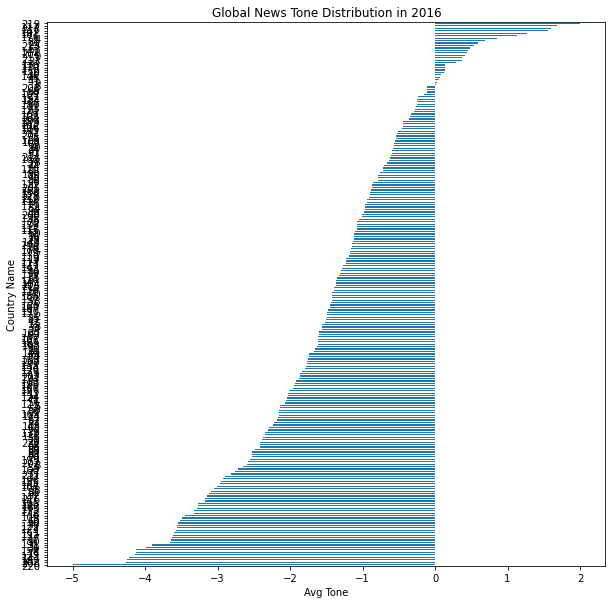

In [110]:
import matplotlib.pyplot as plt
country_mean_sorted \
.plot(kind='barh',stacked=False, figsize=[10,10], legend=False)
######
plt.title('Global News Tone Distribution in 2016')
plt.xlabel('Avg Tone')
plt.ylabel('Country Name')
plt.show()

In [99]:
country_best20 = country_mean_sorted.iloc[200:220]
country_best20

,Country,AvgTone_mean
146,OMN,0.083627
10,ATG,0.124826
130,MNG,0.133127
170,SLB,0.134395
110,LCA,0.142232
133,MUS,0.291832
33,CAS,0.367821
217,WLF,0.373889
0,ABW,0.410868
204,VUT,0.444653


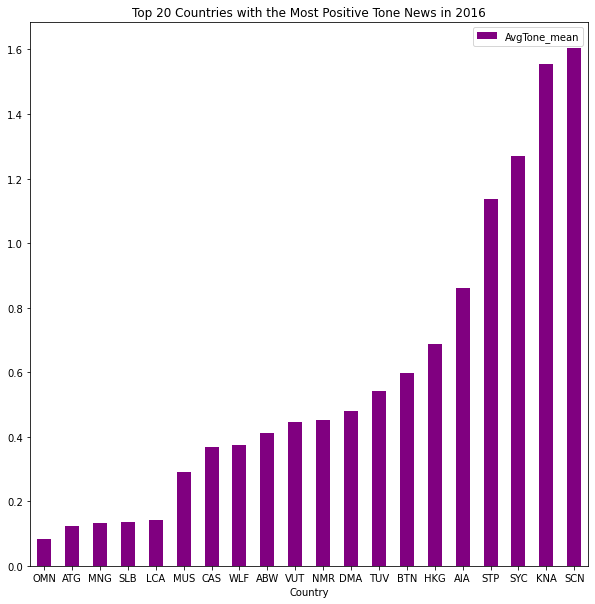

In [109]:
pos = country_best20.plot.bar(x='Country', y='AvgTone_mean', rot=0, figsize=[10,10], color = "purple", title="Top 20 Countries with the Most Positive Tone News in 2016")

In [111]:
country_worst20 = country_mean_sorted.iloc[0:20]
country_worst20

,Country,AvgTone_mean
220,NAF,-4.998527
208,YEM,-4.256367
182,SYR,-4.253860
144,NRU,-4.218909
173,SOM,-4.140004
14,BDI,-4.126763
158,PSE,-4.121354
39,COD,-3.986905
31,CAF,-3.901824
191,TUN,-3.659807


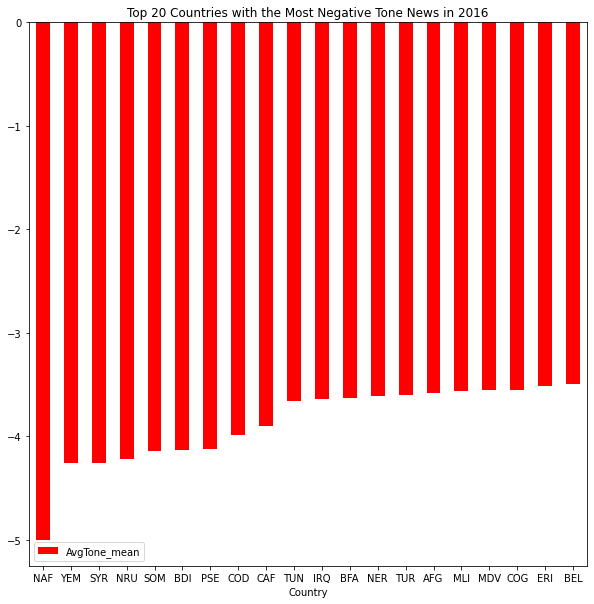

In [113]:
neg = country_worst20.plot.bar(x='Country', y='AvgTone_mean', rot=0, figsize=[10,10], color = "red", title="Top 20 Countries with the Most Negative Tone News in 2016")

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

News Related to China (Actor1 is China): 

In [51]:
dask_feat[dask_feat.Actor1CountryCode == 'CHN'].head(npartitions=-1)

,SQLDATE,MonthYear,Year,Actor1Code,Actor1Name,Actor1CountryCode,Actor2Code,Actor2Name,Actor2CountryCode,QuadClass,...,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Type,Actor2Geo_CountryCode,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Type,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long
1073,20161223,201612,2016,CHN,CHINA,CHN,NaN,NaN,NaN,1,...,39.9289,116.388,0,NaN,NaN,NaN,4,CH,39.9289,116.388
1074,20161223,201612,2016,CHN,CHINA,CHN,NaN,NaN,NaN,1,...,32.9889,117.342,0,NaN,NaN,NaN,4,CH,32.9889,117.342
1075,20161223,201612,2016,CHN,CHINA,CHN,NaN,NaN,NaN,1,...,25.5775,115.256,0,NaN,NaN,NaN,4,CH,25.5775,115.256
1076,20161223,201612,2016,CHN,CHINA,CHN,NaN,NaN,NaN,1,...,35.0000,105,0,NaN,NaN,NaN,1,CH,35.0000,105
1077,20161223,201612,2016,CHN,CHINESE,CHN,NaN,NaN,NaN,1,...,54.0000,-2,0,NaN,NaN,NaN,1,UK,54.0000,-2


Mean of average tones for News Related to China (Actor1 is China):

In [65]:
dask_feat[dask_feat.Actor1CountryCode == 'CHN'].AvgTone.mean().compute()

-0.961569938380273

Mean of average tones for News Related to China (Actor2 is China):

In [69]:
dask_feat[dask_feat.Actor2CountryCode == 'CHN'].AvgTone.mean().compute()

-0.938070685218778

### Sentiment Analysis for Certain Topics

#### News Related to US-China

Mean of average tones for News Related to US-China (Actor1 is China, Actor2 is the US):

In [37]:
china_news1 = dask_feat[dask_feat.Actor1CountryCode == 'CHN']
china_news1[china_news1.Actor2CountryCode == 'USA'].AvgTone.mean().compute()

-1.3531860494884245

Mean of average tones for News Related to US-China (Actor1 is the US, Actor2 is the China):

In [45]:
china_news2 = dask_feat[dask_feat.Actor2CountryCode == 'CHN']
china_news2[china_news2.Actor1CountryCode == 'USA'].AvgTone.mean().compute()

-1.3268823749714935

#### News Related to US-China

Mean of average tones for News Related to US-Russia (Actor1 is Russia, Actor2 is the US):

In [46]:
rus_news1 = dask_feat[dask_feat.Actor1CountryCode == 'RUS']
rus_news1[rus_news1.Actor2CountryCode == 'USA'].AvgTone.mean().compute()

-2.8030116784788057

Mean of average tones for News Related to US-Russia (Actor1 is the US, Actor2 is the Russia):

In [47]:
rus_news2 = dask_feat[dask_feat.Actor2CountryCode == 'RUS']
rus_news2[rus_news2.Actor1CountryCode == 'USA'].AvgTone.mean().compute()

-2.9090902048613976

This shows that Mean of average tones for News Related to the same country can be different, depends on if the country is Actor1 or Actor2.

News Related to China (Actor1 is China) that has most strong negative tones:

In [71]:
dask_feat[dask_feat.Actor1CountryCode == 'CHN'].nsmallest(10, "AvgTone").head()

,SQLDATE,MonthYear,Year,Actor1Code,Actor1Name,Actor1CountryCode,Actor2Code,Actor2Name,Actor2CountryCode,QuadClass,...,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Type,Actor2Geo_CountryCode,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Type,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long
109570,20160728,201607,2016,CHN,CHINA,CHN,USA,LAWRENCE,USA,4,...,35.0000,105,1,CH,35.0000,105,1,CH,35.0000,105
290941,20160303,201603,2016,CHN,CANTON,CHN,USA,OHIO,USA,3,...,40.8167,-81.3665,3,US,40.8167,-81.3665,3,US,40.8167,-81.3665
290942,20160303,201603,2016,CHN,CANTON,CHN,USA,UNITED STATES,USA,3,...,40.8167,-81.3665,2,US,40.3736,-82.7755,2,US,40.3736,-82.7755
186563,20160622,201606,2016,CHN,CHINA,CHN,NaN,NaN,NaN,4,...,35.0000,105,0,NaN,NaN,NaN,1,CH,35.0000,105
186564,20160622,201606,2016,CHN,CHINA,CHN,NaN,NaN,NaN,4,...,35.0000,105,0,NaN,NaN,NaN,1,CH,35.0000,105


News Related to China (Actor1 is China) that has most strong positive tones:

In [75]:
dask_feat[dask_feat.Actor1CountryCode == 'CHN'].nlargest(10, "AvgTone").head()

,SQLDATE,MonthYear,Year,Actor1Code,Actor1Name,Actor1CountryCode,Actor2Code,Actor2Name,Actor2CountryCode,QuadClass,...,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Type,Actor2Geo_CountryCode,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Type,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long
41394,20160523,201605,2016,CHN,CHINA,CHN,NaN,NaN,NaN,3,...,-10.0000,-55,0,NaN,NaN,NaN,1,BR,-10.0000,-55
281807,20161021,201610,2016,CHN,CHINA,CHN,NaN,NaN,NaN,1,...,22.1558,113.557,0,NaN,NaN,NaN,4,MC,22.1558,113.557
60624,20161206,201612,2016,CHN,CHINESE,CHN,UZB,UZBEK,UZB,1,...,41.0000,64,1,CH,35.0,105,1,CH,35.0000,105
60625,20161206,201612,2016,CHN,CHINESE,CHN,UZB,UZBEKISTAN,UZB,1,...,41.0000,64,1,CH,35.0,105,1,UZ,41.0000,64
60633,20161206,201612,2016,CHNGOV,CHINA,CHN,UZB,UZBEKISTAN,UZB,1,...,40.5000,47.5,1,UZ,41.0,64,1,UZ,41.0000,64


Mean of average tones for News Related to US (Actor1 is US):

In [67]:
dask_feat[dask_feat.Actor1CountryCode == 'USA'].AvgTone.mean().compute()

-1.8745312234584668

Mean of average tones for News Related to US (Actor2 is US):

In [68]:
dask_feat[dask_feat.Actor2CountryCode == 'USA'].AvgTone.mean().compute()

-1.9339521799661827

### News Related to Political Figures

#### Donald Trump

In [63]:
trump_news = df_feat[df_feat.SOURCEURL.like("%Trump%") == "true"]

In [72]:
trump_news = trump_news.withColumn("AvgTone", trump_news["AvgTone"].cast("double"))

In [74]:
from pyspark.sql.functions import mean as _mean, stddev as _stddev, col

trump_stats = trump_news.select(
    _mean(col('AvgTone')).alias('mean'),
    _stddev(col('AvgTone')).alias('std')
).collect()

In [77]:
trump_mean = trump_stats[0]['mean']
print(mean)

-1.9007160050075336


In [79]:
trump_std = trump_stats[0]['std']
print(std)

2.5248252621711833


####  Xi Jinping

In [80]:
xjp_news = df_feat[df_feat.SOURCEURL.like("%Jinping%") == "true"]

In [81]:
xjp_news = xjp_news.withColumn("AvgTone", xjp_news["AvgTone"].cast("double"))

In [82]:
xjp_stats = xjp_news.select(
    _mean(col('AvgTone')).alias('mean'),
    _stddev(col('AvgTone')).alias('std')
).collect()

In [83]:
xjp_mean = xjp_stats[0]['mean']
print(xjp_mean)

1.0019052240185844


In [84]:
xjp_std = xjp_stats[0]['std']
print(xjp_std)

3.246660639621753
